# King County House Sales analysis

## 1.0 Business Understanding

## 1.1 Problem Statement

## 1.2 Project Objectives

## 1.3 Context Real Estate prices in the county or state


## 2.0 Data Overview

## 3.0 Data Analysis Approach

## 4.0 Loading the Data 

In [1]:
#Importing libraries
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import csv
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D
from sklearn import linear_model
%matplotlib inline

In [2]:
data = pd.read_csv("data/kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


### 4.1 Data Inspection

In [3]:
#checking data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
#finding unique entries in each column & trying to identify anomalies in the entries
unique_entries = {}
for column in data.columns:
    unique_entries[column] = data[column].unique()

print(unique_entries)

{'id': array([7129300520, 6414100192, 5631500400, ..., 1523300141,  291310100,
       1523300157], dtype=int64), 'date': array(['10/13/2014', '12/9/2014', '2/25/2015', '2/18/2015', '5/12/2014',
       '6/27/2014', '1/15/2015', '4/15/2015', '3/12/2015', '4/3/2015',
       '5/27/2014', '5/28/2014', '10/7/2014', '1/24/2015', '7/31/2014',
       '5/29/2014', '12/5/2014', '4/24/2015', '5/14/2014', '8/26/2014',
       '7/3/2014', '5/16/2014', '11/20/2014', '11/3/2014', '6/26/2014',
       '12/1/2014', '6/24/2014', '3/2/2015', '11/10/2014', '12/3/2014',
       '6/13/2014', '12/30/2014', '2/13/2015', '6/20/2014', '7/15/2014',
       '8/11/2014', '7/7/2014', '10/28/2014', '7/29/2014', '7/18/2014',
       '3/25/2015', '7/16/2014', '4/28/2015', '3/11/2015', '9/16/2014',
       '2/17/2015', '12/31/2014', '2/5/2015', '3/3/2015', '8/19/2014',
       '4/7/2015', '8/27/2014', '2/23/2015', '12/10/2014', '8/28/2014',
       '10/21/2014', '12/7/2014', '6/3/2014', '9/9/2014', '10/9/2014',
       '8/25/201

### 4.2 Data Cleaning

In [5]:
#check duplicates
data.duplicated().value_counts()

False    21597
Name: count, dtype: int64

In [6]:
#check for nulls 
data.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [7]:
#exploring columns with nulls
data['waterfront'].unique()

array([nan, 'NO', 'YES'], dtype=object)

In [8]:
data['waterfront'].value_counts()

waterfront
NO     19075
YES      146
Name: count, dtype: int64

Given majority of entries have entry 'NO' - we will make assumption and replace nan with 'NO'

In [9]:
data['waterfront'].fillna('NO', inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [11]:
data['view'].unique()

array(['NONE', nan, 'GOOD', 'EXCELLENT', 'AVERAGE', 'FAIR'], dtype=object)

In [12]:
data['view'].value_counts()

view
NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: count, dtype: int64

From the above cell we see that 'NONE' is the predominant entry value in the view column, hence we will replace nan with 'NONE'

In [13]:
data['view'].fillna('NONE', inplace=True)

In [14]:
data['yr_renovated'].unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [15]:
data['yr_renovated'].value_counts()

yr_renovated
0.0       17011
2014.0       73
2013.0       31
2003.0       31
2007.0       30
          ...  
1951.0        1
1953.0        1
1946.0        1
1976.0        1
1948.0        1
Name: count, Length: 70, dtype: int64

17011 rows have year entry as 0.0.. hence alot of houses have not been renovated. We wont drop this column, for the nan values we will assume they've not been renovated hence replace with 0.

In [16]:
# Replacing nans in yr_renovated

data['yr_renovated'].fillna('0.', inplace=True)

In [17]:
#recheck for nulls 
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  object 
 9   view           21597 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  object 
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [19]:
#Bedrooms values
data['bedrooms'].value_counts()

bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64

In [20]:
#Bathroom values
data['bathrooms'].value_counts()

bathrooms
2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: count, dtype: int64

In [21]:
#Handle non numeric data in sqft_basement column
data['sqft_basement'].unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [22]:
data['sqft_basement'].value_counts()

sqft_basement
0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1920.0        1
3480.0        1
2730.0        1
2720.0        1
248.0         1
Name: count, Length: 304, dtype: int64

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  object 
 9   view           21597 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  object 
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [24]:
#Replace rows with '?' with median value of 'sqft_basement' column

column_name = 'sqft_basement'
placeholder = '?' 

# Convert the column to numeric, excluding rows with the placeholder value
numeric_values = pd.to_numeric(data['sqft_basement'], errors='coerce')
filtered_values = numeric_values[numeric_values.notna()]

# median value for the filtered column
median_value = np.median(filtered_values)

# Replace the object values with the median value
data['sqft_basement'] = np.where(data['sqft_basement'] == placeholder, median_value, data['sqft_basement'])

In [25]:
data['sqft_basement'].value_counts()

sqft_basement
0.0       12826
0.0         454
600.0       217
500.0       209
700.0       208
          ...  
1920.0        1
3480.0        1
2730.0        1
2720.0        1
248.0         1
Name: count, Length: 304, dtype: int64

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  object 
 9   view           21597 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  object 
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [27]:
# Convert dtype for 'sqft_basement' column from object to float64 to enable calculations
data.sqft_basement = data.sqft_basement.astype(float)

In [28]:
data['sqft_basement'].value_counts()

sqft_basement
0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
1920.0        1
3480.0        1
2730.0        1
2720.0        1
248.0         1
Name: count, Length: 303, dtype: int64

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  object 
 9   view           21597 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  object 
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [30]:
#reviewing unique values for categorical variables

columns = ['waterfront', 'view', 'condition', 'grade']

for column in columns:
    unique_values = data[column].unique()
    print(f"Unique values for column '{column}':")
    print(unique_values)
    print()

Unique values for column 'waterfront':
['NO' 'YES']

Unique values for column 'view':
['NONE' 'GOOD' 'EXCELLENT' 'AVERAGE' 'FAIR']

Unique values for column 'condition':
['Average' 'Very Good' 'Good' 'Poor' 'Fair']

Unique values for column 'grade':
['7 Average' '6 Low Average' '8 Good' '11 Excellent' '9 Better' '5 Fair'
 '10 Very Good' '12 Luxury' '4 Low' '3 Poor' '13 Mansion']



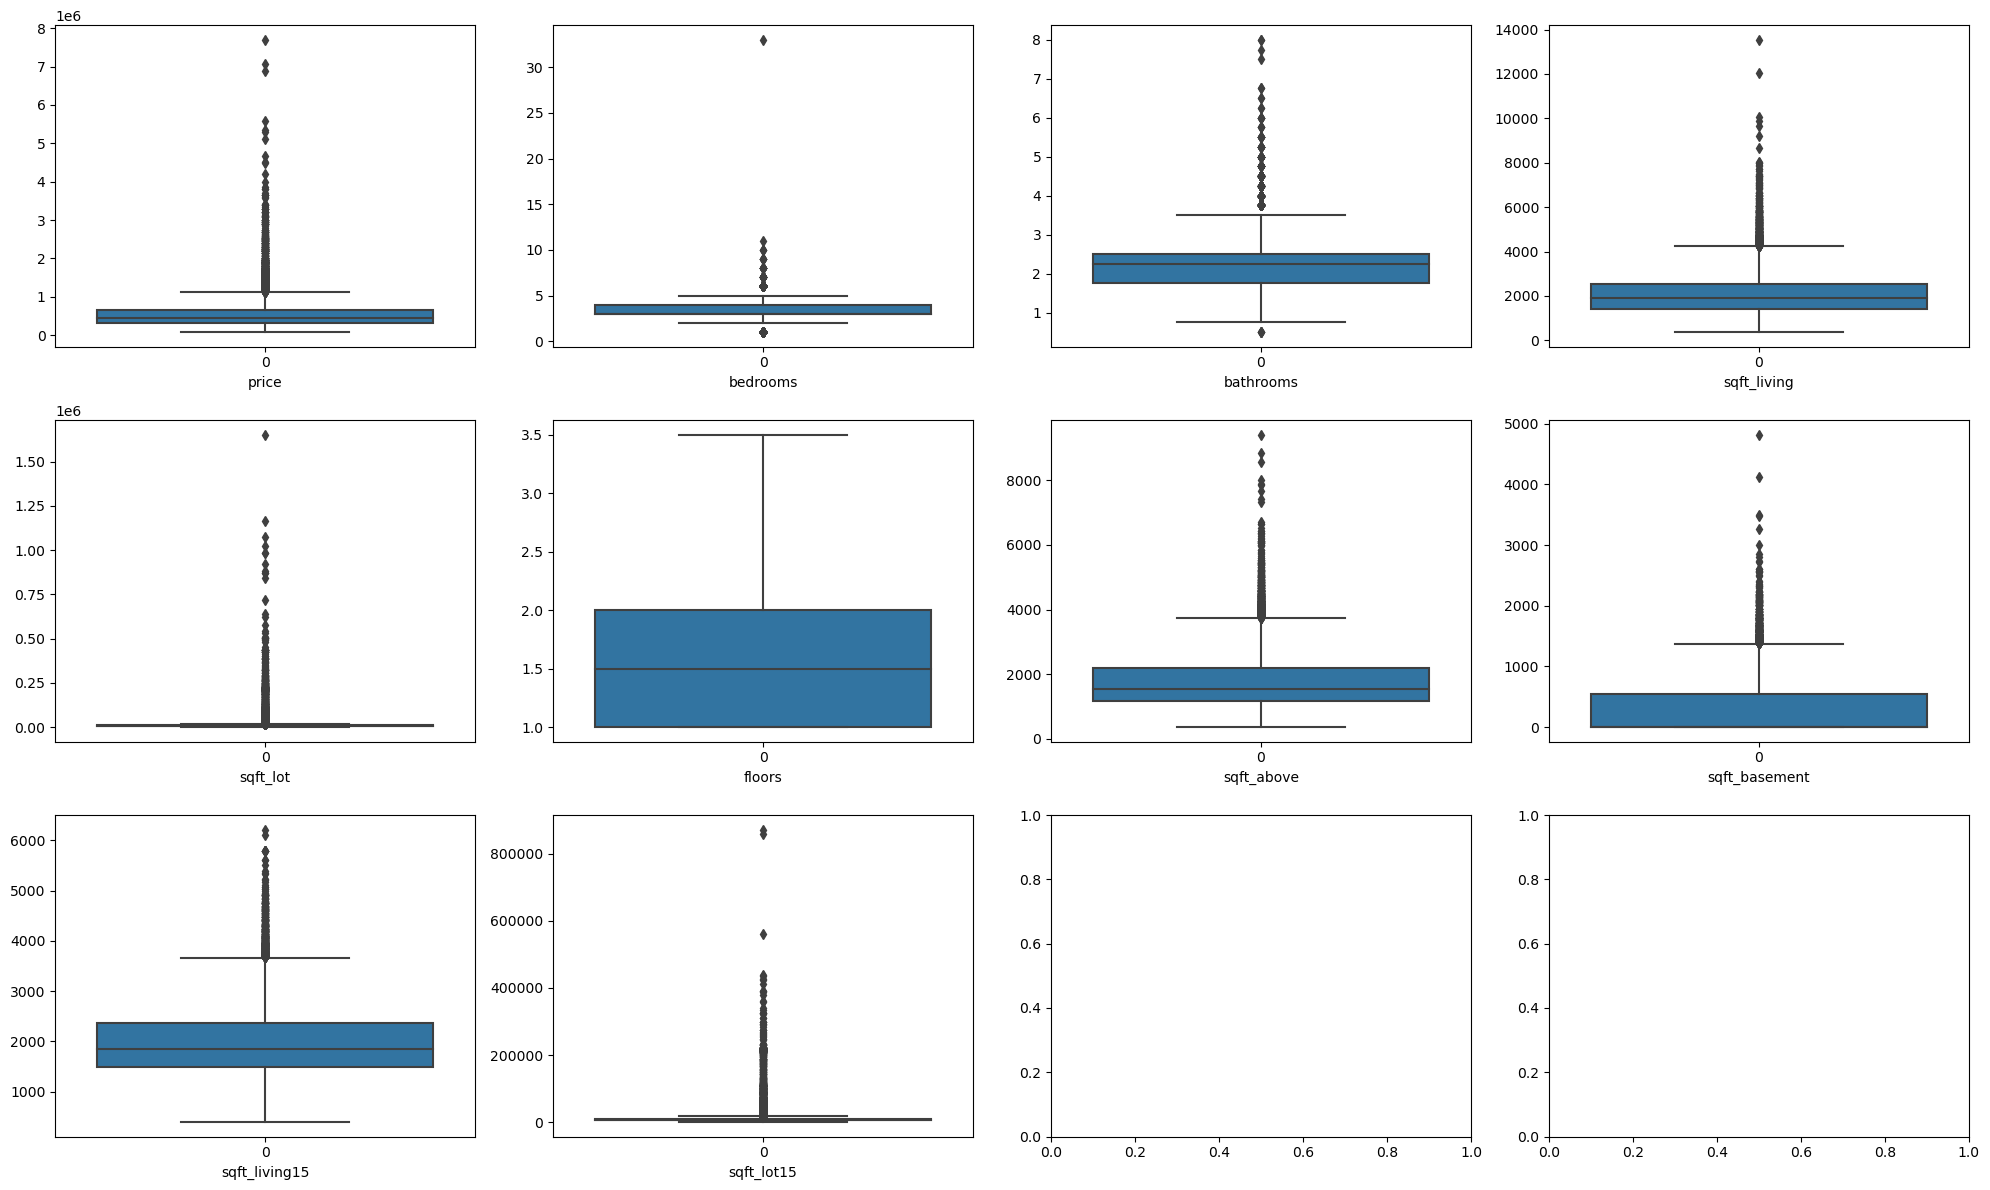

In [31]:
# Outlier Analysis for numeric variables
fig, axs = plt.subplots(3, 4, figsize=(20,12))

# Column names
columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
           'floors', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']

# Iterate over the columns and create the box plots
for i, column in enumerate(columns):
    sns.boxplot(data[column], ax=axs[i // 4, i % 4])
    axs[i // 4, i % 4].set_xlabel(column)  

plt.tight_layout()

plt.show()

Observation - all numeric variables except floors have alot of outliers.Given this is real data, I want to avoid removing outliers indiscriminately. Hence i choose to remove based on IQR for sqft_living and sqft_lot variables. Bedrooms have one entry with 33 bedrooms. We hope to remove this entry via IQR. If doesnt work, we will drop the record separately.

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  object 
 9   view           21597 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  object 
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [33]:
# Handle outliers in numeric columns
columns_outlier = ['sqft_living', 'sqft_lot']

# Function to handle outliers
def handle_outliers(column):
    data[column] = pd.to_numeric(data[column], errors='coerce')  # Convert column to numeric
    q1 = np.percentile(data[column].dropna(), 25)  # 1st quartile
    q3 = np.percentile(data[column].dropna(), 75)  # 3rd quartile
    iqr = q3 - q1  # Interquartile range

    # Calculate the lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Exclude values outside the lower and upper bounds
    data[column] = np.where((data[column] >= lower_bound) & (data[column] <= upper_bound),
                            data[column], np.nan)

# Iterate over the columns and handle outliers
for column in columns_outlier:
    handle_outliers(column)

# Drop rows with outliers across all columns
data.dropna(inplace=True)

# Reset the index 
data.reset_index(drop=True, inplace=True)

In [34]:
#dataframe post handling outliers
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18861 entries, 0 to 18860
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             18861 non-null  int64  
 1   date           18861 non-null  object 
 2   price          18861 non-null  float64
 3   bedrooms       18861 non-null  int64  
 4   bathrooms      18861 non-null  float64
 5   sqft_living    18861 non-null  float64
 6   sqft_lot       18861 non-null  float64
 7   floors         18861 non-null  float64
 8   waterfront     18861 non-null  object 
 9   view           18861 non-null  object 
 10  condition      18861 non-null  object 
 11  grade          18861 non-null  object 
 12  sqft_above     18861 non-null  int64  
 13  sqft_basement  18861 non-null  float64
 14  yr_built       18861 non-null  int64  
 15  yr_renovated   18861 non-null  object 
 16  zipcode        18861 non-null  int64  
 17  lat            18861 non-null  float64
 18  long  

In [35]:
data['bedrooms'].value_counts()

bedrooms
3     8812
4     5806
2     2573
5     1253
6      204
1      173
7       23
8        8
9        5
10       2
11       1
33       1
Name: count, dtype: int64

In [36]:
# Separately drop the entry with 33 bedrooms to reduce the skewness of this column
data = data.drop(data[data['bedrooms'] == 33].index)

In [37]:
# Decision to drop entry with 11 bedrooms to reduce the skewness of this column
data = data.drop(data[data['bedrooms'] == 11].index)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18859 entries, 0 to 18860
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             18859 non-null  int64  
 1   date           18859 non-null  object 
 2   price          18859 non-null  float64
 3   bedrooms       18859 non-null  int64  
 4   bathrooms      18859 non-null  float64
 5   sqft_living    18859 non-null  float64
 6   sqft_lot       18859 non-null  float64
 7   floors         18859 non-null  float64
 8   waterfront     18859 non-null  object 
 9   view           18859 non-null  object 
 10  condition      18859 non-null  object 
 11  grade          18859 non-null  object 
 12  sqft_above     18859 non-null  int64  
 13  sqft_basement  18859 non-null  float64
 14  yr_built       18859 non-null  int64  
 15  yr_renovated   18859 non-null  object 
 16  zipcode        18859 non-null  int64  
 17  lat            18859 non-null  float64
 18  long       

In [39]:
data['bedrooms'].value_counts()

bedrooms
3     8812
4     5806
2     2573
5     1253
6      204
1      173
7       23
8        8
9        5
10       2
Name: count, dtype: int64

In [40]:
data['sqft_basement'].value_counts()

sqft_basement
0.0       11626
500.0       196
700.0       194
600.0       194
800.0       178
          ...  
1940.0        1
1548.0        1
1630.0        1
861.0         1
248.0         1
Name: count, Length: 242, dtype: int64

In [41]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.885900e+04,1.885900e+04,18859.000000,18859.000000,18859.000000,18859.000000,18859.000000,18859.000000,18859.000000,18859.000000,18859.000000,18859.000000,18859.000000,18859.000000,18859.000000
mean,4.731922e+09,4.985757e+05,3.327748,2.050692,1944.145077,7319.121852,1.484013,1673.572777,265.115277,1969.978260,98081.299910,47.562192,-122.228494,1893.147781,7338.491012
std,2.871848e+09,2.747182e+05,0.884075,0.714025,741.912017,3583.135905,0.544252,693.933817,400.356434,30.054711,54.040487,0.136666,0.132457,604.080633,4416.883406
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,520.000000,1.000000,370.000000,0.000000,1900.000000,98001.000000,47.155900,-122.512000,460.000000,651.000000
25%,2.296600e+09,3.125000e+05,3.000000,1.500000,1380.000000,4850.000000,1.000000,1160.000000,0.000000,1950.000000,98033.000000,47.479200,-122.336000,1450.000000,5000.000000
50%,4.055701e+09,4.350000e+05,3.000000,2.000000,1830.000000,7200.000000,1.000000,1490.000000,0.000000,1971.000000,98074.000000,47.573600,-122.266000,1770.000000,7210.000000
75%,7.504011e+09,6.100000e+05,4.000000,2.500000,2400.000000,9339.000000,2.000000,2050.000000,510.000000,1997.000000,98118.000000,47.679050,-122.152000,2230.000000,9000.000000
max,9.900000e+09,3.100000e+06,10.000000,7.500000,4230.000000,19141.000000,3.500000,4230.000000,2070.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,196591.000000


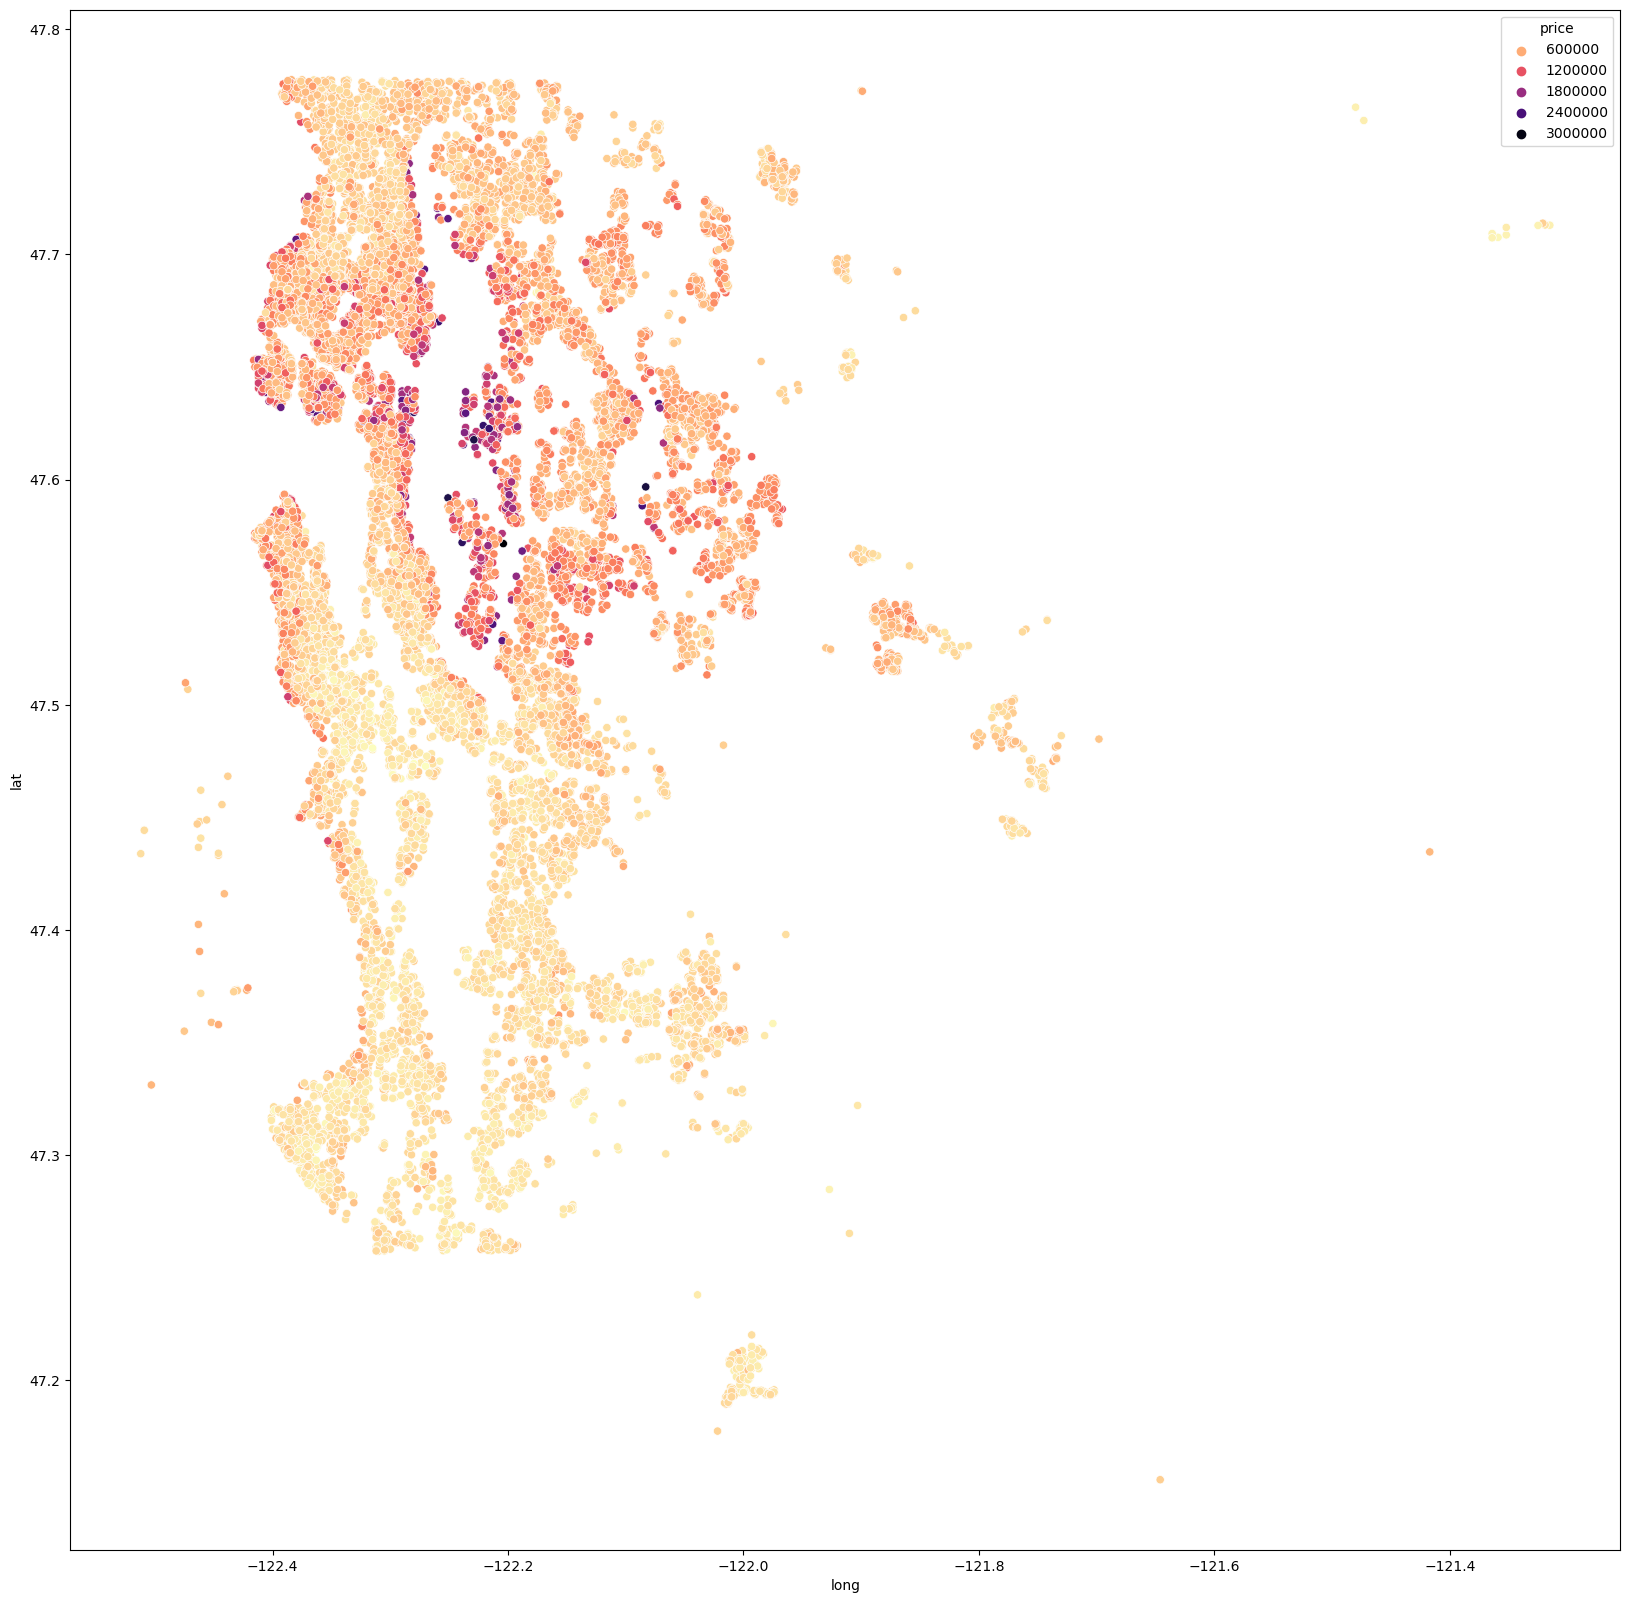

In [42]:
# reviewing latitude and longitude to see if any outliers

plt.figure(figsize=(20,20))

sns.scatterplot(data=data, x="long", y="lat", hue="price", palette="magma_r");

Observed afew outliers on the longitude, hence will drop them to reduce noise in the model.

In [43]:
# drop the houses at extreme longtude as they are few and seem out of place from other houses
data.drop(data[data['long'] > -121.7].index, inplace=True)

# looking for outliers in the percentiles
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.884500e+04,1.884500e+04,18845.000000,18845.000000,18845.000000,18845.000000,18845.000000,18845.000000,18845.000000,18845.000000,18845.000000,18845.000000,18845.000000,18845.000000,18845.000000
mean,4.731421e+09,4.987643e+05,3.328416,2.051061,1944.586734,7316.942690,1.483948,1673.872327,265.253330,1969.983391,98081.345662,47.562132,-122.229100,1893.614964,7334.824197
std,2.871384e+09,2.747126e+05,0.883840,0.713971,741.899235,3581.487444,0.544379,694.030508,400.437923,30.049812,54.033695,0.136626,0.130589,603.944830,4412.959213
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,520.000000,1.000000,370.000000,0.000000,1900.000000,98001.000000,47.177500,-122.512000,460.000000,651.000000
25%,2.296500e+09,3.125000e+05,3.000000,1.500000,1380.000000,4850.000000,1.000000,1160.000000,0.000000,1950.000000,98033.000000,47.479200,-122.336000,1450.000000,5000.000000
50%,4.055701e+09,4.350000e+05,3.000000,2.000000,1830.000000,7200.000000,1.000000,1490.000000,0.000000,1971.000000,98074.000000,47.573500,-122.266000,1770.000000,7210.000000
75%,7.504010e+09,6.100000e+05,4.000000,2.500000,2400.000000,9333.000000,2.000000,2052.000000,510.000000,1997.000000,98118.000000,47.679000,-122.152000,2230.000000,9000.000000
max,9.900000e+09,3.100000e+06,10.000000,7.500000,4230.000000,19141.000000,3.500000,4230.000000,2070.000000,2015.000000,98199.000000,47.777600,-121.730000,5790.000000,196591.000000


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18845 entries, 0 to 18860
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             18845 non-null  int64  
 1   date           18845 non-null  object 
 2   price          18845 non-null  float64
 3   bedrooms       18845 non-null  int64  
 4   bathrooms      18845 non-null  float64
 5   sqft_living    18845 non-null  float64
 6   sqft_lot       18845 non-null  float64
 7   floors         18845 non-null  float64
 8   waterfront     18845 non-null  object 
 9   view           18845 non-null  object 
 10  condition      18845 non-null  object 
 11  grade          18845 non-null  object 
 12  sqft_above     18845 non-null  int64  
 13  sqft_basement  18845 non-null  float64
 14  yr_built       18845 non-null  int64  
 15  yr_renovated   18845 non-null  object 
 16  zipcode        18845 non-null  int64  
 17  lat            18845 non-null  float64
 18  long       

In [45]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## 5.0 Exploratory data analysis

EDA will enable understanding the data.

* It will bring out obvious multicollinearity
* It will also help in identify predictors with strong association with the target (price)

In [46]:
#Correlation matrix for numeric variables

numeric_df = data[['price', 'bedrooms','bathrooms', 'sqft_living','sqft_lot', 'floors','sqft_above', 'sqft_basement']]
numeric_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement
0,221900.0,3,1.00,1180.0,5650.0,1.0,1180,0.0
1,538000.0,3,2.25,2570.0,7242.0,2.0,2170,400.0
2,180000.0,2,1.00,770.0,10000.0,1.0,770,0.0
3,604000.0,4,3.00,1960.0,5000.0,1.0,1050,910.0
4,510000.0,3,2.00,1680.0,8080.0,1.0,1680,0.0


In [47]:
#Correlation matrix for numeric variables
correlation_matrix = numeric_df.corr()
correlation_matrix 

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement
price,1.000000,0.282895,0.443030,0.621942,0.061911,0.253928,0.508767,0.265612
bedrooms,0.282895,1.000000,0.505665,0.616656,0.200876,0.161178,0.493501,0.277800
bathrooms,0.443030,0.505665,1.000000,0.719362,0.000111,0.513314,0.639590,0.218867
sqft_living,0.621942,0.616656,0.719362,1.000000,0.236266,0.345917,0.844723,0.380961
sqft_lot,0.061911,0.200876,0.000111,0.236266,1.000000,-0.332387,0.193246,0.101207
floors,0.253928,0.161178,0.513314,0.345917,-0.332387,1.000000,0.539763,-0.288645
sqft_above,0.508767,0.493501,0.639590,0.844723,0.193246,0.539763,1.000000,-0.164526
sqft_basement,0.265612,0.277800,0.218867,0.380961,0.101207,-0.288645,-0.164526,1.000000


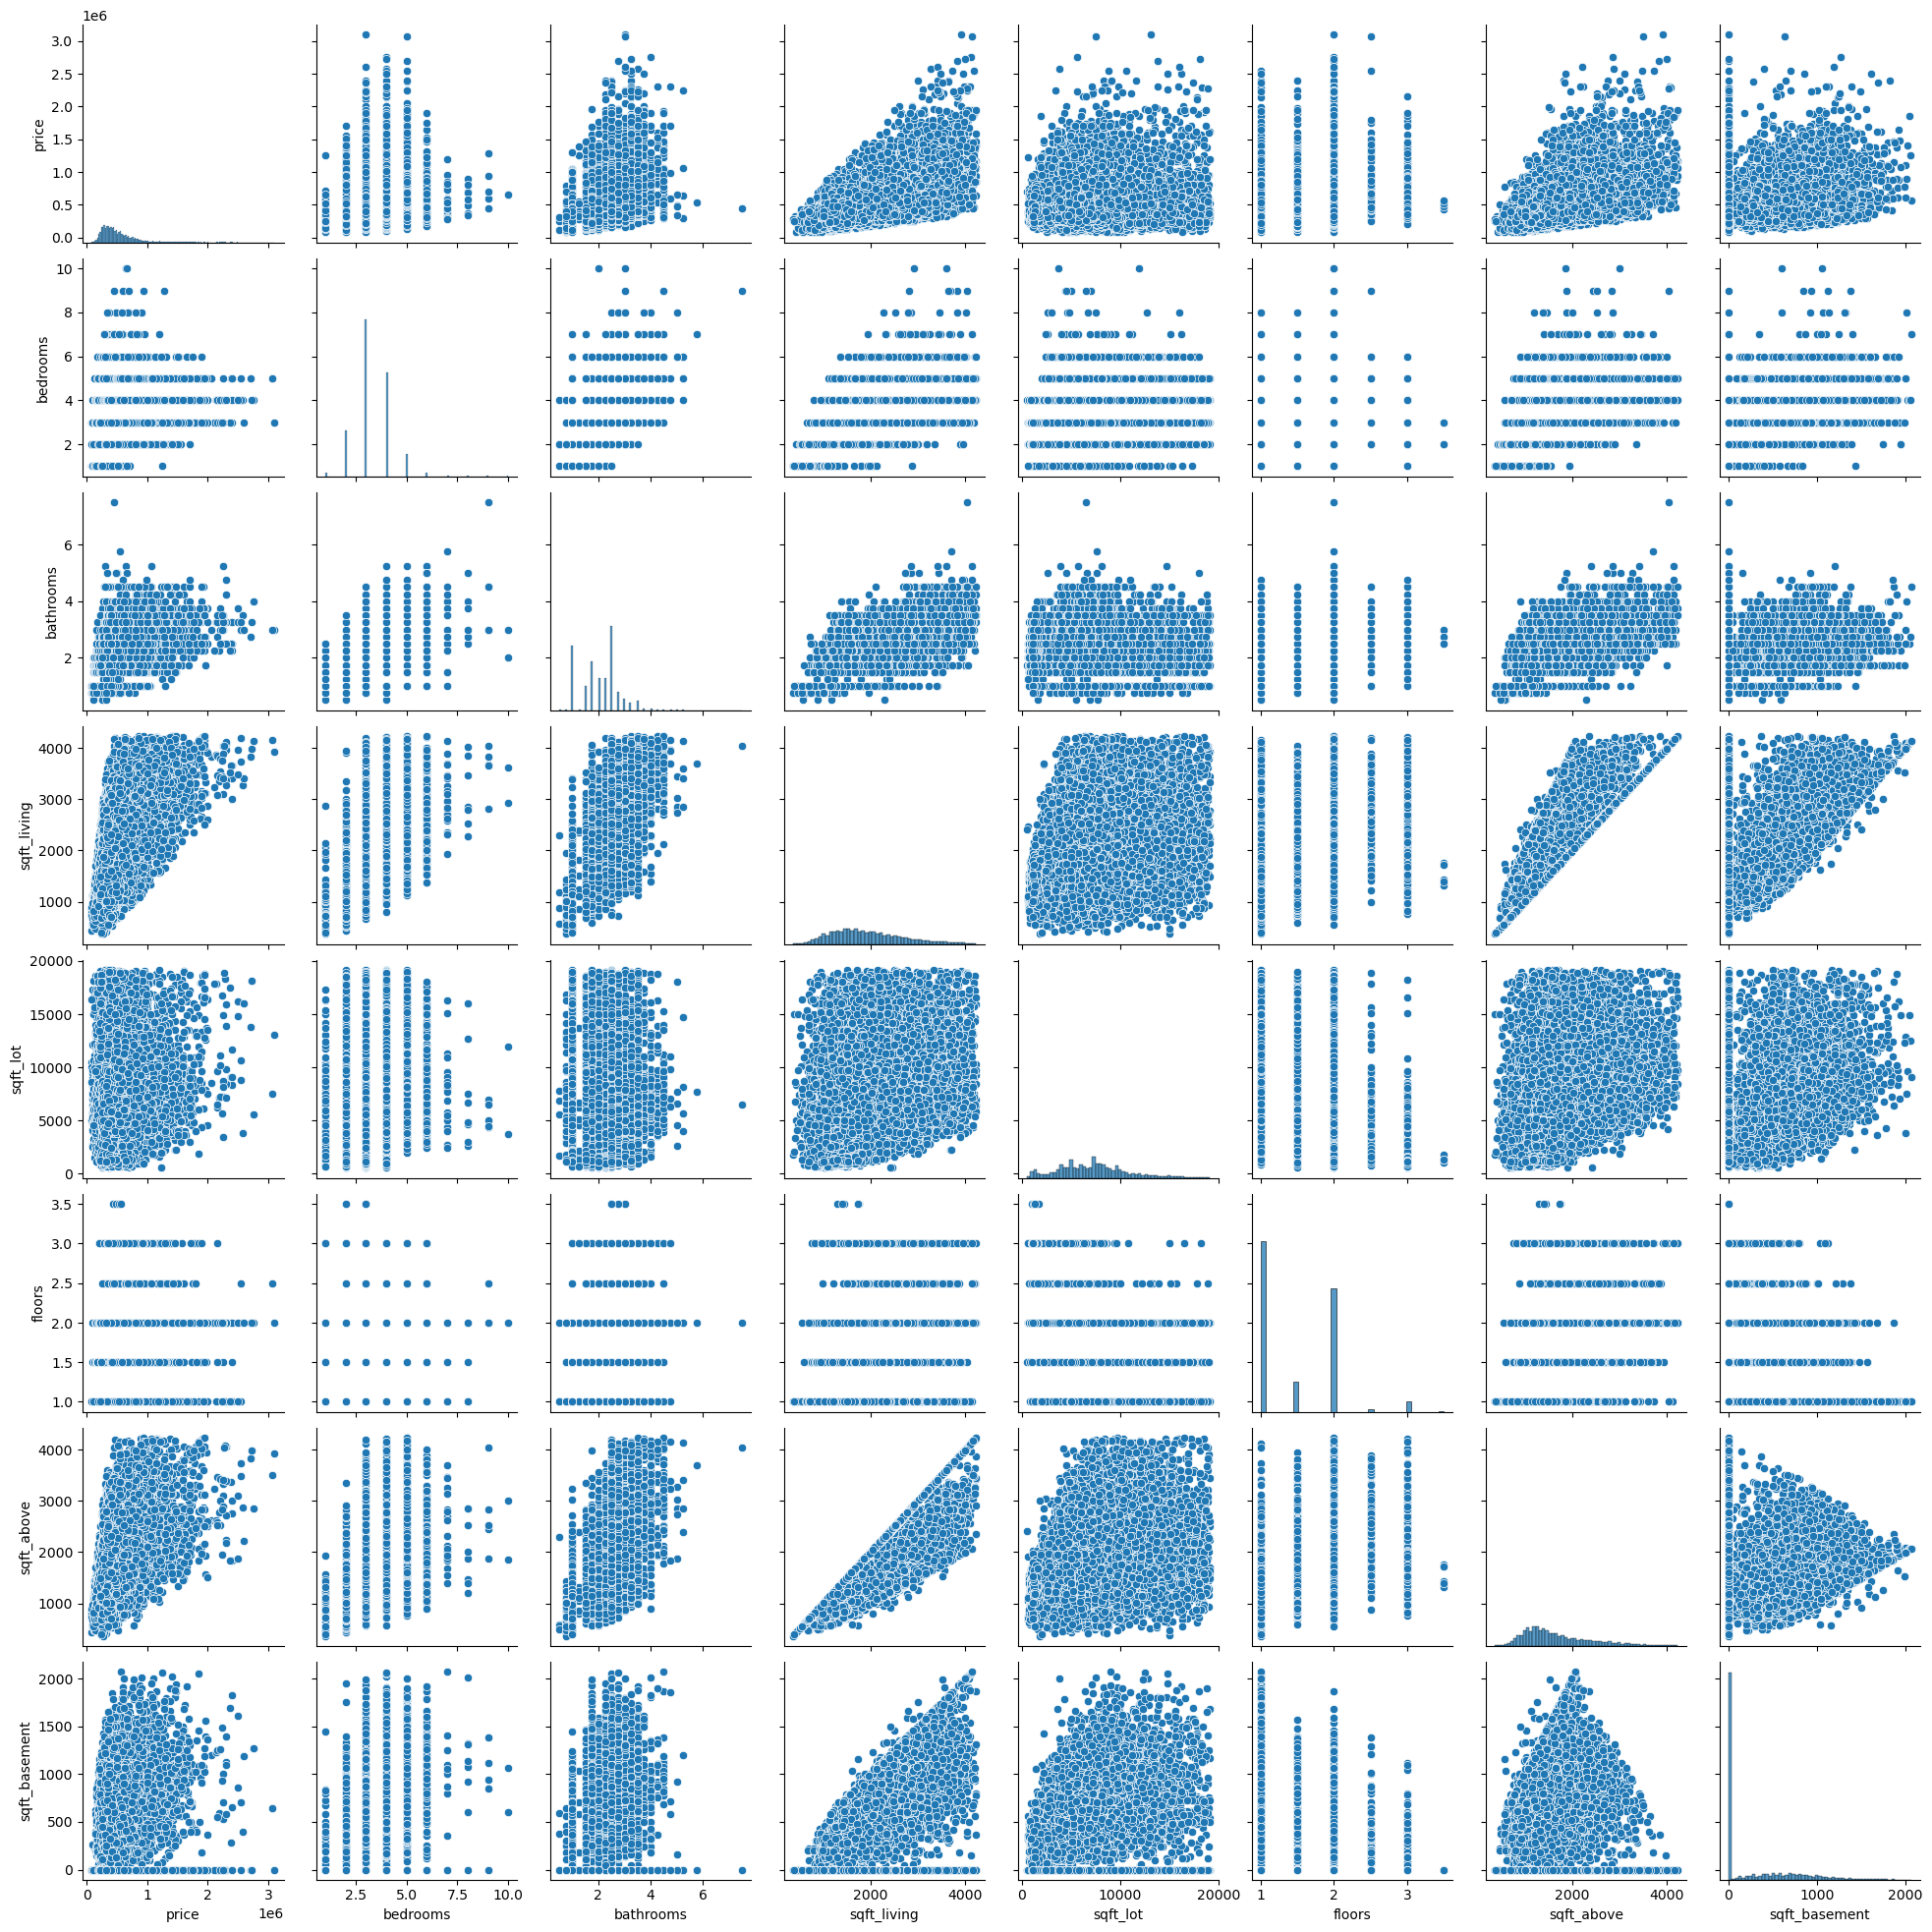

In [52]:
#Correlation matrix for numeric variables - visualization
sns.pairplot(numeric_df)
plt.show()

Observation: The correlation analysis above shows that sqft_living has the highest correlation with price. On the other hand, there is strong collinearity between numeric variables, especially sqft_lving having strong with sqft_above, bathroom and bedroom variables. Hence decision to use sqft_living only as the numeric variable in the model.

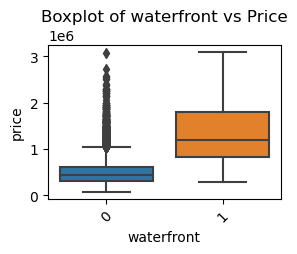

In [53]:
# Plotting 'waterfront' against price

x = data['waterfront']
y = data['price']

plt.figure(figsize=(3, 2))
sns.boxplot(x=x, y=y)
plt.title('Boxplot of waterfront vs Price')
plt.xticks(rotation=45)
plt.show()

Observation: Waterfront 'YES' meaning when a house has a waterfront, increases price of house

In [54]:
# Binary variable encoding

variable =  ['waterfront']

# Defining the map function
def binary_map(x):
    return x.map({'YES': 1, "NO": 0})

# Applying the function to the housing list
data[variable] = data[variable].apply(binary_map)

In [55]:
data['waterfront'].unique()

array([nan])

In [56]:
data['waterfront'].value_counts()

Series([], Name: count, dtype: int64)

Observation:
* waterfront variable - extremely limited houses have waterfronts i.e. 15 while 14079 do not have. Hence will exclude waterfront as a feature.

In [57]:
#Relationship between target and multi category categorical variables
categorical_vars = data[['view', 'condition', 'grade', 'zipcode']]
y = data['price']

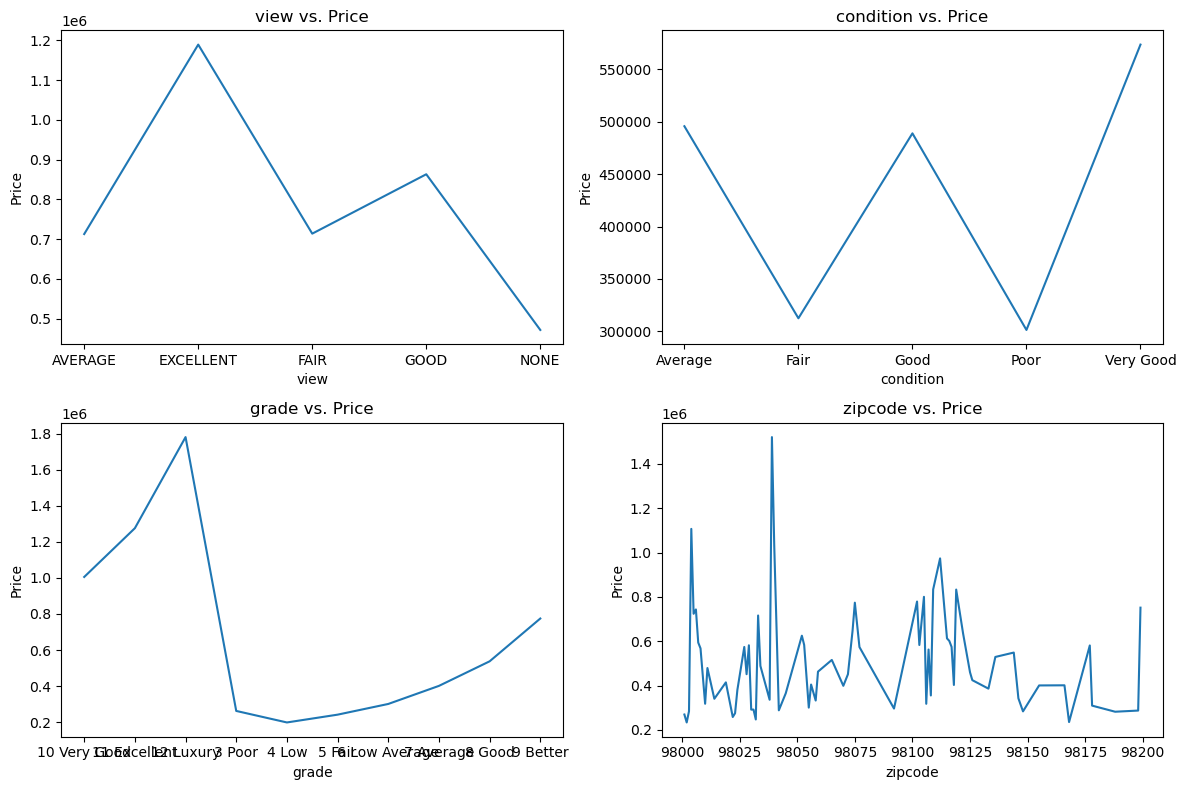

In [58]:
categorical_vars = data[['view', 'condition', 'grade', 'zipcode']]
y = data['price']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

for i, var in enumerate(categorical_vars):
    row = i // 2
    col = i % 2

    ax = axes[row][col]
    grouped_data = data.groupby(var)['price'].mean()
    ax.plot(grouped_data.index, grouped_data.values)
    ax.set_xlabel(var)
    ax.set_ylabel('Price')
    ax.set_title(f'{var} vs. Price')

plt.tight_layout()
plt.show()

Observation: 
* View - Houses with excellent view are highest priced. Houses without view have lowest price
* Condition - As expected, houses in very good condition attract highest price while poor condition attract lowest price
* Grade - Grade seems like a similar measure to condition, hence will not use it in the modelling
* zipcode - Price varies significantly with zip code. Though we will need to categorize the zipcodes to high, medium and low price inorder to use encode this column for modelling

In [59]:
#zipcode analysis
zip_average_price = data.groupby('zipcode')['price'].mean().sort_values(ascending=False)
zip_average_price

zipcode
98039    1.520926e+06
98004    1.107002e+06
98040    1.033614e+06
98112    9.738298e+05
98109    8.339479e+05
             ...     
98001    2.698085e+05
98022    2.585777e+05
98032    2.475114e+05
98168    2.356904e+05
98002    2.339996e+05
Name: price, Length: 70, dtype: float64

In [60]:
zipcode_counts = data['zipcode'].value_counts()
print(zipcode_counts)

zipcode
98103    600
98115    577
98117    550
98052    520
98034    517
        ... 
98077     47
98014     43
98070     30
98024     27
98039     27
Name: count, Length: 70, dtype: int64


In [61]:
# Categorizing zipcodes

# Calculate the average house price per zip code
average_prices = data.groupby('zipcode')['price'].mean()

# Reverse the order of average prices
average_prices_reversed = average_prices.sort_values(ascending=False)

# Assign ranks to the zip codes based on reversed average house price
zip_rank = pd.qcut(average_prices_reversed, q=10, labels=False, duplicates='drop')
zip_rank = zip_rank.max() - zip_rank + 1

# Create a new column 'zip_rank' in the DataFrame to store the ranks
data['zip_rank'] = data['zipcode'].map(zip_rank)

In [62]:
grouped_data = data.groupby('zip_rank')['price'].mean()
print(grouped_data)

zip_rank
1     957708.872254
2     725589.017553
3     606205.756061
4     573946.662434
5     495050.309392
6     417676.093561
7     377250.551372
8     323232.069421
9     289858.688239
10    260345.843284
Name: price, dtype: float64


In [63]:
data.isnull().sum()

id                   0
date                 0
price                0
bedrooms             0
bathrooms            0
sqft_living          0
sqft_lot             0
floors               0
waterfront       18845
view                 0
condition            0
grade                0
sqft_above           0
sqft_basement        0
yr_built             0
yr_renovated         0
zipcode              0
lat                  0
long                 0
sqft_living15        0
sqft_lot15           0
zip_rank             0
dtype: int64

In [64]:
#reviewing unique values for categorical variables

columns = ['waterfront', 'view', 'condition', 'grade']

for column in columns:
    unique_values = data[column].unique()
    print(f"Unique values for column '{column}':")
    print(unique_values)
    print()

Unique values for column 'waterfront':
[nan]

Unique values for column 'view':
['NONE' 'GOOD' 'EXCELLENT' 'AVERAGE' 'FAIR']

Unique values for column 'condition':
['Average' 'Very Good' 'Good' 'Fair' 'Poor']

Unique values for column 'grade':
['7 Average' '6 Low Average' '8 Good' '9 Better' '10 Very Good' '5 Fair'
 '4 Low' '11 Excellent' '3 Poor' '12 Luxury']



In [65]:
# Applying ordinal encoding to categorical variables

from sklearn.preprocessing import OrdinalEncoder

# categories for each variable
view_categories = ['NONE', 'AVERAGE', 'FAIR' , 'GOOD', 'EXCELLENT']
condition_categories = ['Poor', 'Fair', 'Good', 'Average', 'Very Good']
grade_categories = ['3 Poor','4 Low','5 Fair','6 Low Average', '7 Average', '8 Good', '9 Better', '10 Very Good', '11 Excellent', '12 Luxury']

# instance of the OrdinalEncoder
encoder = OrdinalEncoder(categories=[view_categories, condition_categories, grade_categories]) 

# Fit and transform the categorical variables
encoded_data = encoder.fit_transform(data[['view', 'condition','grade']])

# Add the encoded columns to the original DataFrame
data_encoded = data.copy()
data_encoded[['view', 'condition', 'grade']] = encoded_data

# Print the updated DataFrame
print(data_encoded)

               id        date     price  bedrooms  bathrooms  sqft_living   
0      7129300520  10/13/2014  221900.0         3       1.00       1180.0  \
1      6414100192   12/9/2014  538000.0         3       2.25       2570.0   
2      5631500400   2/25/2015  180000.0         2       1.00        770.0   
3      2487200875   12/9/2014  604000.0         4       3.00       1960.0   
4      1954400510   2/18/2015  510000.0         3       2.00       1680.0   
...           ...         ...       ...       ...        ...          ...   
18856   263000018   5/21/2014  360000.0         3       2.50       1530.0   
18857  6600060120   2/23/2015  400000.0         4       2.50       2310.0   
18858  1523300141   6/23/2014  402101.0         2       0.75       1020.0   
18859   291310100   1/16/2015  400000.0         3       2.50       1600.0   
18860  1523300157  10/15/2014  325000.0         2       0.75       1020.0   

       sqft_lot  floors  waterfront  view  ...  sqft_above  sqft_basement  

In [66]:
data_encoded.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,zip_rank
0,7129300520,10/13/2014,221900.0,3,1.00,1180.0,5650.0,1.0,NaN,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,8
1,6414100192,12/9/2014,538000.0,3,2.25,2570.0,7242.0,2.0,NaN,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,5
2,5631500400,2/25/2015,180000.0,2,1.00,770.0,10000.0,1.0,NaN,0.0,...,770,0.0,1933,0.,98028,47.7379,-122.233,2720,8062,6
3,2487200875,12/9/2014,604000.0,4,3.00,1960.0,5000.0,1.0,NaN,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,5
4,1954400510,2/18/2015,510000.0,3,2.00,1680.0,8080.0,1.0,NaN,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2


In [67]:
# drop columns we will not be using in readiness for modelling
columns_to_drop = ['date', 'yr_built', 'yr_renovated', 'waterfront']
data_encoded = data_encoded.drop(columns_to_drop, axis=1)

In [68]:
data_encoded.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,zip_rank
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,0.0,3.0,4.0,1180,0.0,98178,47.5112,-122.257,1340,5650,8
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,0.0,3.0,4.0,2170,400.0,98125,47.7210,-122.319,1690,7639,5
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,0.0,3.0,3.0,770,0.0,98028,47.7379,-122.233,2720,8062,6
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,0.0,4.0,4.0,1050,910.0,98136,47.5208,-122.393,1360,5000,5
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,0.0,3.0,5.0,1680,0.0,98074,47.6168,-122.045,1800,7503,2


<Axes: xlabel='bathrooms', ylabel='price'>

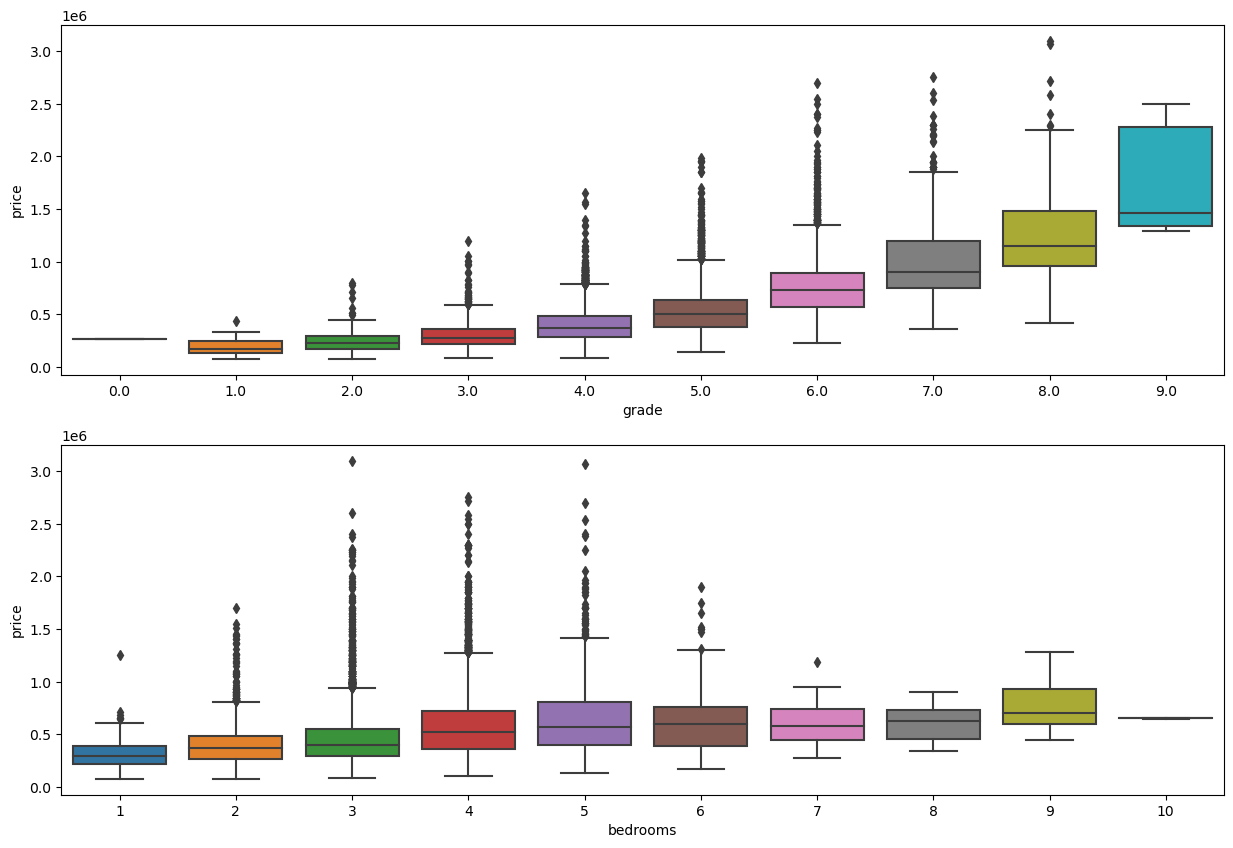

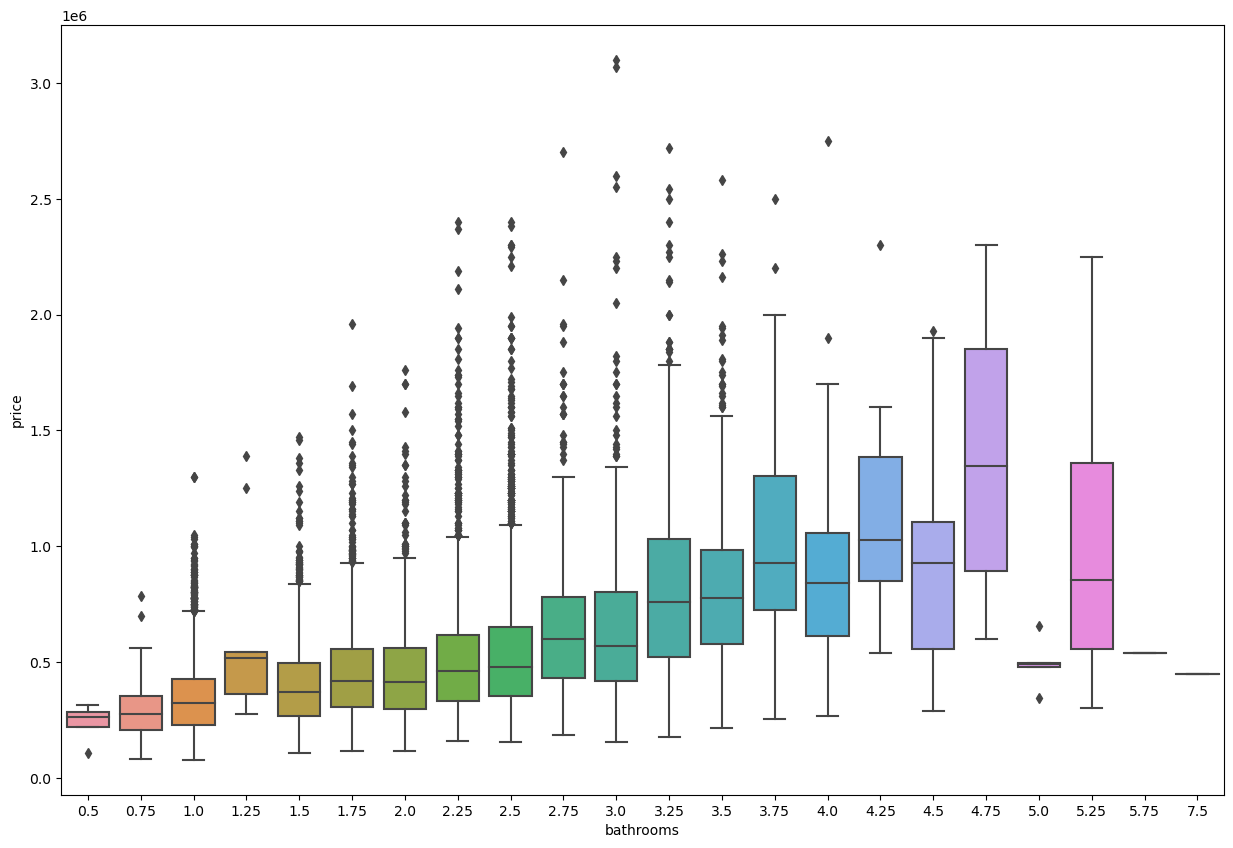

In [69]:
# Relationship between ordinal variables & price

fig,ax=plt.subplots(2,1,figsize=(15,10))
sns.boxplot(x=data_encoded['grade'],y=data_encoded['price'],ax=ax[0])
sns.boxplot(x=data_encoded['bedrooms'],y=data_encoded['price'],ax=ax[1])
_ , axes = plt.subplots(1, 1, figsize=(15,10))
sns.boxplot(x=data_encoded['bathrooms'],y=data_encoded['price'])

<Axes: xlabel='bathrooms', ylabel='price'>

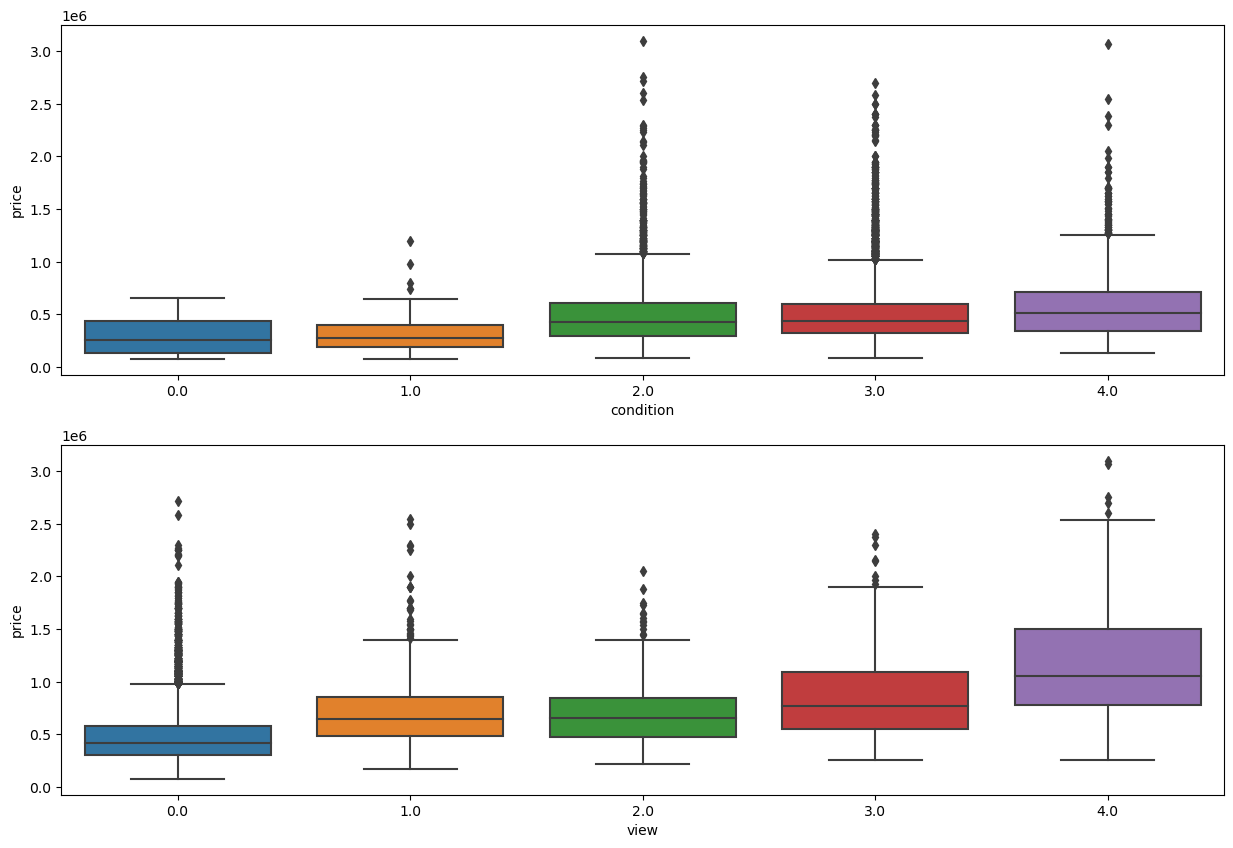

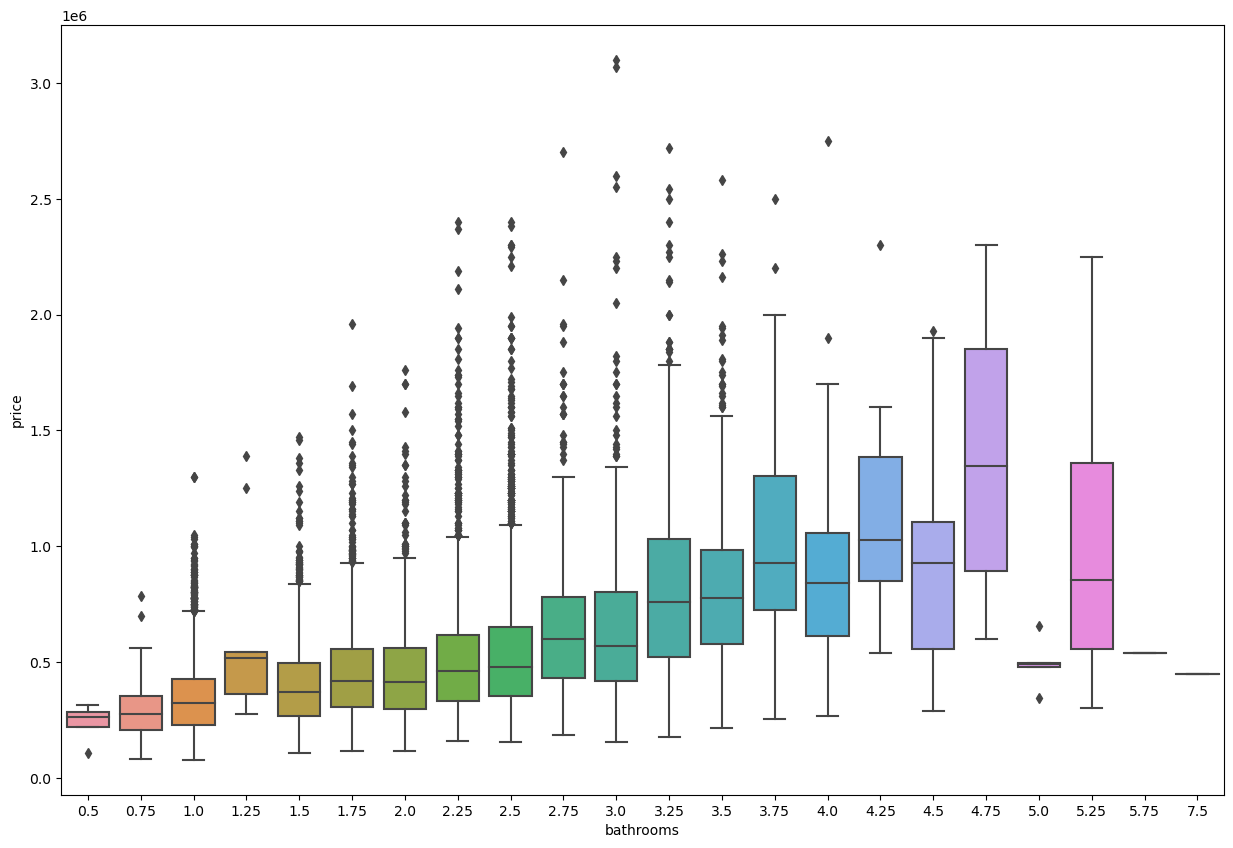

In [70]:
# Relationship between ordinal variables & price

fig,ax=plt.subplots(2,1,figsize=(15,10))
sns.boxplot(x=data_encoded['condition'],y=data_encoded['price'],ax=ax[0])
sns.boxplot(x=data_encoded['view'],y=data_encoded['price'],ax=ax[1])
_ , axes = plt.subplots(1, 1, figsize=(15,10))
sns.boxplot(x=data_encoded['bathrooms'],y=data_encoded['price'])

Boxplots observations:
* Grade - As the grade increases, the price of the house increases, hence a great predictor variable.
* Bedrooms - As the bedrooms increase from 1-5 b/rooms, there is a minimal increase in price. From 6-9 b/rooms.. the price of houses starts to fall. At 10 bedrooms, the price again rises but almost equivalent to the impact of a 5 b/roomed house. This shows that the variable has a negative impact on past past five bedrooms. Also, the marginal increases show that bedrooms are not a good predictor of price.
* View - Increases house price as view increases but we noticed a view of 1 & 2 have the same contribution to price increase.
* Bathrooms - upto 4.75 bathrooms, there is consistent increase in price. Past 4.75 bathrooms, there is a negative influence on price.
* Condition - Very minimal influence on price - hence will not use this variable.

## 6.0 Modelling

##### Validating correlation & multicolliarity

In [73]:
data_encoded.corr()["price"].sort_values()

zip_rank        -0.652015
zipcode         -0.007215
long            -0.004873
id               0.005622
sqft_lot15       0.045048
sqft_lot         0.061911
condition        0.074441
floors           0.253928
sqft_basement    0.265612
bedrooms         0.282895
view             0.360496
lat              0.382805
bathrooms        0.443030
sqft_above       0.508767
sqft_living15    0.554034
sqft_living      0.621942
grade            0.631748
price            1.000000
Name: price, dtype: float64

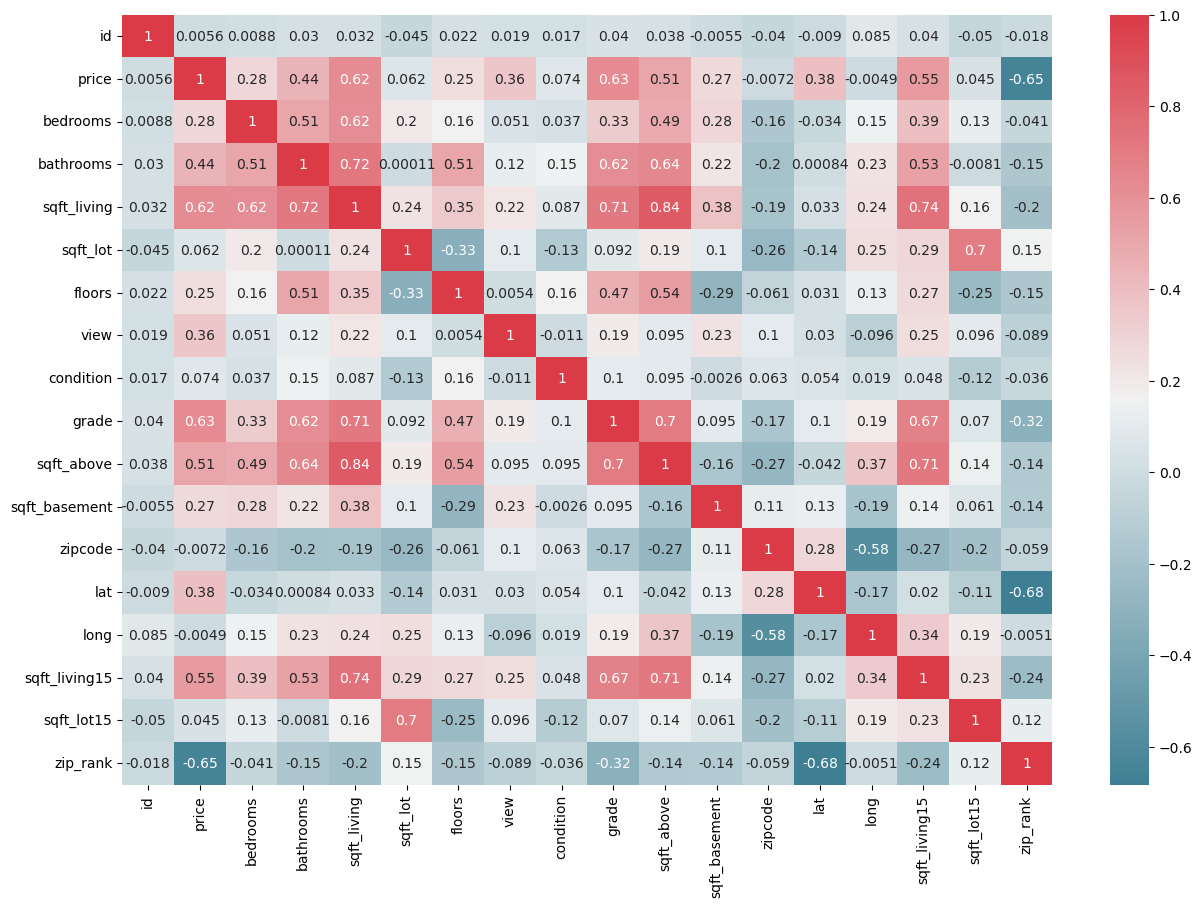

In [72]:
# Heatmap
def correlation_heatmap(df1):
    _,ax=plt.subplots(figsize=(15,10))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(data_encoded.corr(),annot=True,cmap=colormap)
    
correlation_heatmap(data_encoded)

Observations:
* From the correlation,heatmap and above analysis we prioritize the below variables to build our prediction models:
Variable:        Corr:
* view             0.360496
* lat              0.382805
* bathrooms        0.443030
* sqft_above       0.508767
* sqft_living15    0.554034
* sqft_living      0.621942
* grade            0.631748

#### Splitting the data
Train_test_split - This splits the data into ratio (80–20), of which train_size is 80%, test_size is 20%. The data is trained to predict a line and then the test data is used to see if the line fits perfectly or not.
In order to get the same train ans test subsets we declare a random state. 

In [74]:
train_data,test_data=train_test_split(data_encoded,train_size=0.8,random_state=3)

#### Model 1 - Simple Linear Regression


##### 'sqft_living' has the highest correlation with price. We will build a simple linear regression model as a starter.

In [98]:
reg=linear_model.LinearRegression()
x_train=np.array(train_data['sqft_living']).reshape(-1,1)
y_train=np.array(train_data['price']).reshape(-1,1)
reg.fit(x_train,y_train)

x_test=np.array(test_data['sqft_living']).reshape(-1,1)
y_test=np.array(test_data['price']).reshape(-1,1)
pred=reg.predict(x_test)
print('Simple linear model')
mean_squared_error=metrics.mean_squared_error(y_test,pred)
print('Squared mean error', round(np.sqrt(mean_squared_error),2))
print('R squared training',round(reg.score(x_train,y_train),3))
print('R squared testing',round(reg.score(x_test,y_test),3) )
print('intercept',reg.intercept_)
print('coefficient',reg.coef_)

Simple linear model
Squared mean error 215620.44
R squared training 0.388
R squared testing 0.383
intercept [50088.40154548]
coefficient [[230.18330702]]


In [77]:
#model_1 
y = data_encoded["price"]
X_model_1 = data_encoded[["sqft_living"]]

In [78]:
model_1 = sm.OLS(y, sm.add_constant(X_model_1))
model_1_results = model_1.fit()

print(model_1_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                 1.189e+04
Date:                Sat, 08 Jul 2023   Prob (F-statistic):               0.00
Time:                        16:25:53   Log-Likelihood:            -2.5814e+05
No. Observations:               18845   AIC:                         5.163e+05
Df Residuals:                   18843   BIC:                         5.163e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5.094e+04   4396.324     11.586      

Interpretation and Observations:
The model is statistically significant overall, with an F-statistic p-value well below 0.05
The model explains about 38% of the variance in price
The model coefficients (const and sqft_living) are both statistically significant, with t-statistic p-values well below 0.05
Per the model - If the house had 0 sqft, we would expect price of $50940.
* With this finding, we will create a extra simple LR models from the other numerical variables

##### Scatterplot for model_1
A scatterplot graph is plotted for x_test, y_test. The data is spread over the graph. Now the line obtained from above is plotted to see how it fits for the data.

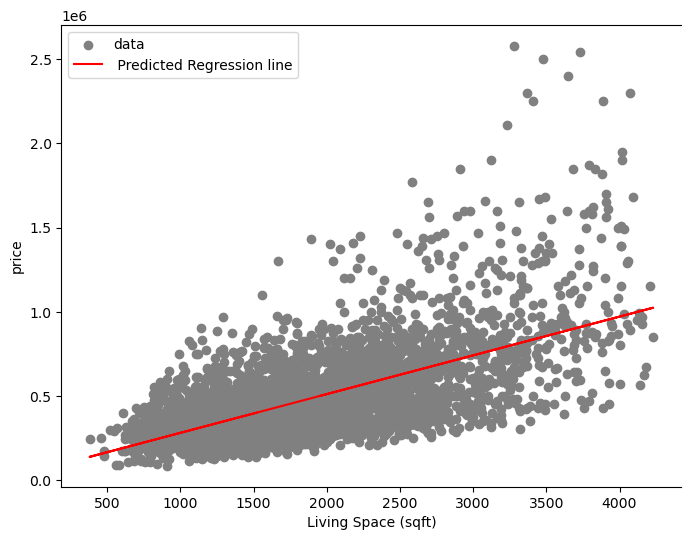

In [96]:
_, ax = plt.subplots(figsize= (8, 6))
plt.scatter(x_test, y_test, color= 'grey', label = 'data')
plt.plot(x_test, reg.predict(x_test), color='red', label= ' Predicted Regression line')
plt.xlabel('Living Space (sqft)')
plt.ylabel('price')
plt.legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

In [79]:
#model_2
y = data_encoded["price"]
X_model_2 = data_encoded[["bathrooms"]]

In [80]:
model_2 = sm.OLS(y, sm.add_constant(X_model_2))
model_2_results = model_2.fit()

print(model_2_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     4602.
Date:                Sat, 08 Jul 2023   Prob (F-statistic):               0.00
Time:                        16:26:27   Log-Likelihood:            -2.6069e+05
No. Observations:               18845   AIC:                         5.214e+05
Df Residuals:                   18843   BIC:                         5.214e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.491e+05   5457.460     27.327      0.0

Interpretation: 
* Model is significant. Bathrooms explain price by 19.6%
* Next step - create more simple linear regression models 

##### Scatterplot for model_2

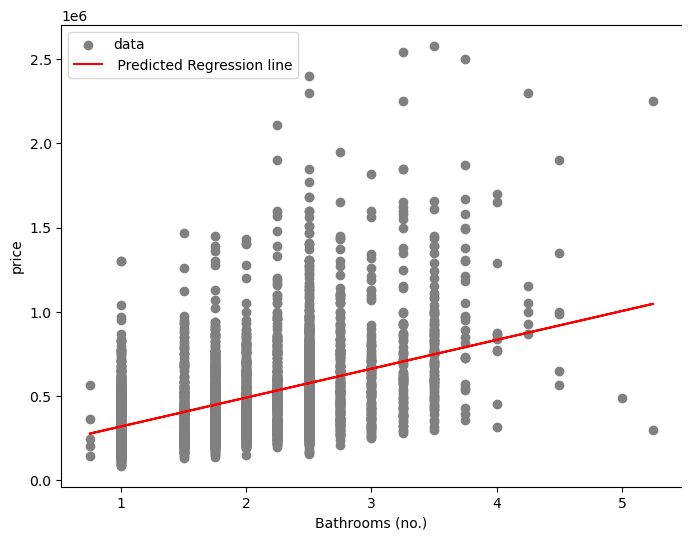

In [97]:
reg=linear_model.LinearRegression()
x_train=np.array(train_data['bathrooms']).reshape(-1,1)
y_train=np.array(train_data['price']).reshape(-1,1)
reg.fit(x_train,y_train)

x_test=np.array(test_data['bathrooms']).reshape(-1,1)
y_test=np.array(test_data['price']).reshape(-1,1)
pred=reg.predict(x_test)

_, ax = plt.subplots(figsize= (8, 6))
plt.scatter(x_test, y_test, color= 'grey', label = 'data')
plt.plot(x_test, reg.predict(x_test), color='red', label= ' Predicted Regression line')
plt.xlabel('Bathrooms (no.)')
plt.ylabel('price')
plt.legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

Observation - Shows non linear relationship

### Multiple Linear regression models

#### A model with more numerical variables

In [101]:
#model_5
y = data_encoded["price"]
X_model_5 = data_encoded[["sqft_living", "bathrooms", "sqft_above", "sqft_living15", 'bedrooms']]

In [102]:
model_5 = sm.OLS(y, sm.add_constant(X_model_5))
model_5_results = model_5.fit()

print(model_5_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     2765.
Date:                Sat, 08 Jul 2023   Prob (F-statistic):               0.00
Time:                        16:49:09   Log-Likelihood:            -2.5756e+05
No. Observations:               18845   AIC:                         5.151e+05
Df Residuals:                   18839   BIC:                         5.152e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          7.151e+04   6987.195     10.234

Observation:
* including 5 numerical variables in model_5 gave us R-squared of ~ 42% which is a minor improvement from model_1 which had sqft_living variable only. 
* Model_5 has a high condition number showing strong multicolliniarity in numeric variables
* However, in the next model, we will mix numeric and categorical variables.
* sqft_above and bedrooms produced negative coefficients - which was against our expectation

In [105]:
#model_6 - Modelling for both numerical and categorical variables
y = data_encoded["price"]
X_model_6 = data_encoded[["sqft_living", "bathrooms", "sqft_living15",'bedrooms', 'lat','floors', 'sqft_lot', 'view','grade']]

In [106]:
model_6 = sm.OLS(y, sm.add_constant(X_model_6))
model_6_results = model_6.fit()

print(model_6_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     3472.
Date:                Sat, 08 Jul 2023   Prob (F-statistic):               0.00
Time:                        16:52:50   Log-Likelihood:            -2.5353e+05
No. Observations:               18845   AIC:                         5.071e+05
Df Residuals:                   18835   BIC:                         5.072e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.109e+07   4.38e+05    -71.069

Observation:
* In model_6 we added categorical variables to to the numerical variables and this has increased R-squared to 62%
* On the other, we've stablished that sqft_above, sqft_basement, and condition variables have p-values above 0.05, indicating that their coefficients are not statistically significant, hence will not have a significant influence on price, hence decision to drop them from the next model.

In [319]:
data_encoded.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
zip_rank         0
dtype: int64

### Standardizing numerical variables

Standardizing will enable model evaluation. Standardization or normalization puts the units of the coefficients obtained on a similar scale.
Our approach will be to standardize only the predictor numerical variables.

As indicated above, we shall drop 'sqft_above', 'sqft_basement', and 'condition'

In [320]:
# Separate the numerical, ordinal features and target variable

y = data_encoded["price"]
X = data_encoded["sqft_living", "bathrooms", "sqft_living15",'bedrooms', 'lat','floors', 'sqft_lot']


KeyError: ('sqft_living', 'bathrooms', 'sqft_living15', 'bedrooms', 'lat', 'floors', 'sqft_lot')

In [321]:
# Separate the numerical, ordinal features and target variable
numerical_features = ["sqft_living", "bathrooms", "sqft_living15",'bedrooms', 'lat','floors', 'sqft_lot']
ordinal_features = ['view','grade']

target_variable = ["price"]

X_numerical = data_encoded[numerical_features]
X_ordinal = data_encoded[ordinal_features]
y = data_encoded[target_variable]

# Standardize the numerical features
scaler = StandardScaler()
X_numerical_scaled = pd.DataFrame(scaler.fit_transform(X_numerical), columns=numerical_features)

# Combine the standardized numerical features with the ordinal features & target variable into one df
X_y_combined = pd.concat([X_numerical_scaled, X_ordinal,y], axis=1)


In [322]:
X_y_combined.head()

,sqft_living,bathrooms,sqft_living15,bedrooms,lat,floors,sqft_lot,view,grade,price
0,-1.030608,-1.472174,-0.916689,-0.371588,-0.372796,-0.889014,-0.465445,4.0,5.0,221900.0
1,0.843012,0.278645,-0.337151,-0.371588,1.162826,0.947989,-0.020926,4.0,5.0,538000.0
2,-1.583258,-1.472174,1.368348,-1.503045,1.286525,-0.889014,0.749166,4.0,6.0,180000.0
3,0.020776,1.329136,-0.883573,0.759868,-0.302529,-0.889014,-0.646939,4.0,5.0,604000.0
4,-0.356644,-0.071519,-0.155010,-0.371588,0.400139,-0.889014,0.213062,4.0,4.0,510000.0


In [323]:
#check for nulls 
X_y_combined.isnull().sum()

sqft_living      16
bathrooms        16
sqft_living15    16
bedrooms         16
lat              16
floors           16
sqft_lot         16
view             16
grade            16
price            16
dtype: int64

In [324]:
null_rows = X_y_combined[X_y_combined.isnull().any(axis=1)]
print(null_rows)

       sqft_living  bathrooms  sqft_living15  bedrooms       lat    floors   
2235     -0.599271  -1.472174      -0.883573 -0.371588  0.890542  0.947989  \
2534     -0.720584  -1.472174      -0.419942 -0.371588  0.221544  0.947989   
2853     -0.060100  -0.771847       0.325179 -0.371588  0.847358  0.029488   
4177     -0.531874  -0.421683      -0.221243 -0.371588 -1.846934 -0.889014   
5063      0.155569   0.628808       0.258946  0.759868 -0.052935 -0.889014   
5255     -1.124963  -1.472174      -0.155010 -0.371588  1.404368  0.029488   
7575     -0.963211   0.278645      -1.032597 -1.503045  0.416974  0.947989   
8724     -0.936253  -1.472174      -1.065713 -1.503045  0.968861 -0.889014   
9447      0.532988  -0.421683       0.060247  0.759868  0.854677 -0.889014   
11129    -1.408027  -1.472174      -0.701432 -2.634501  1.413884 -0.889014   
11493    -0.437519  -0.421683      -0.949806 -0.371588  0.852481 -0.889014   
12690    -0.666667  -1.472174      -0.751107  0.759868 -0.358889

In [325]:
X_combined.dropna(inplace=True)

In [326]:
from sklearn.linear_model import LinearRegression

# Simple Linear Regression model - mimicking model_1
model = LinearRegression()

# Fit the model using the training data
model.fit(X_train[['sqft_living']], y_train)

# Make predictions on the test data
y_pred = model.predict(X_test[['sqft_living']])


# Scatter plot of the test data
plt.scatter(X_test['sqft_living'], y_test, color='blue', label='Actual')

# Regression line
plt.plot(X_test['sqft_living'], y_pred, color='red', label='Prediction')

# Set plot labels and title
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.title('Scatter Plot with Regression Line')

# Display legend
plt.legend()

NameError: name 'X_train' is not defined

In [327]:
# Multiple Linear regresssion with scaled variables
# model_7
model_7 = sm.OLS(y, sm.add_constant(X_combined))
model_7_results = model_7.fit()

print(model_7_results.summary())

ValueError: The indices for endog and exog are not aligned

In [328]:
#check for nulls 
X_combined.isnull().sum()

sqft_living      0
bathrooms        0
sqft_living15    0
bedrooms         0
lat              0
floors           0
sqft_lot         0
view             0
grade            0
dtype: int64

In [329]:
#check for nulls 
y.isnull().sum()

price    0
dtype: int64

##### Model evaluation based on the model coefficients and statistical significance (p-values):

* Based on this very small (0.00) f_pvalue, we can say that the model is statistically significant
* The 'sqft_living' has a positive coefficient with a statistically significant p-value (p < 0.001), indicating that it has a significant positive relationship with the target variable. An increase in the square footage of living space is associated with an increase in the predicted price.

* The 'bathrooms' has a negative coefficient with a statistically significant p-value (p < 0.001), suggesting that a higher number of bathrooms is associated with a decrease in the predicted price. This can also be interpretted as, too many bathrooms do not make sense in a house.

* The sqft_above, sqft_basement, and condition have p-values above 0.05, indicating that their coefficients are not statistically significant. These variables may not have a significant impact on the predicted price, hence we may consider dropping them from the model.

* Other variables such as sqft_living15, bedrooms, lat, floors, sqft_lot, view, and grade have statistically significant coefficients (p < 0.05), suggesting they have a significant impact on the predicted price.

* Model's overall goodness of fit - The above variables have been able to explain 62% of the price variance only. This might indicate that there are other variables that affect price that we've not considered.

* The Omnibus, Jarque-Bera (JB) tests: with a low p-value (p < 0.05) in the Omnibus and JB tests suggests the residuals are not normally distributed.

Observation: Shows a linear relation although not strong.

## 7.0 Regression results

## 8.0 Recommendations